### Importing Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Read and Visualize the data

In [37]:
df = pd.read_csv(r'C:\Commback\Learnings\Data Science\Machine Learning 1\Clustering Assignement\Country-data.csv')

In [38]:
# View the data
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [39]:
#rows and columns in the dataframe
df.shape

(167, 10)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Check for Missing values

In [41]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Converting exports, health and imports from Percetage value to actual value 

In [42]:
df['exports']=df['exports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100

In [43]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


#### Checking for outliers

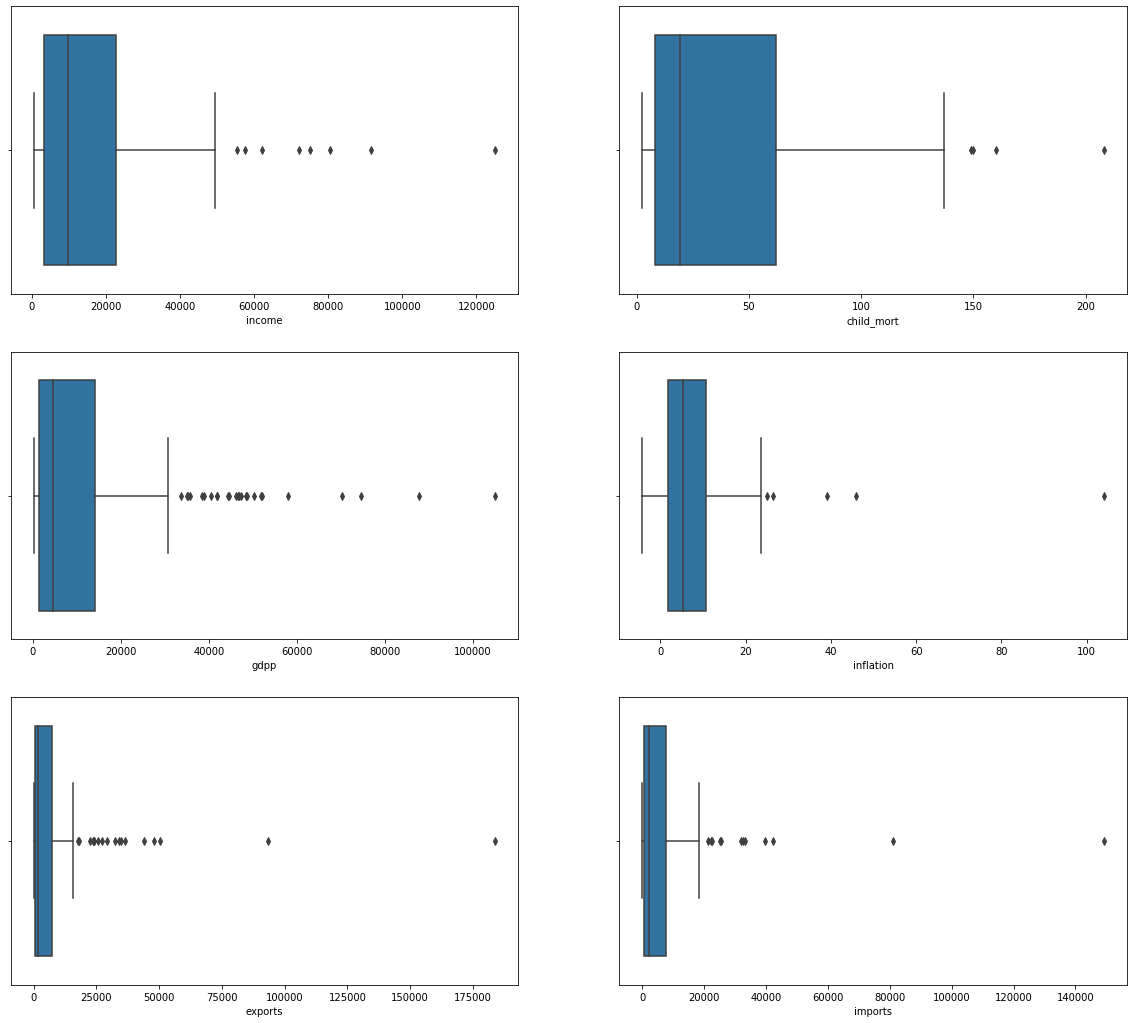

In [44]:
plt.figure(figsize=(20,18))

plt.subplot(3,2,1)
sns.boxplot('income',data=df)

plt.subplot(3,2,2)
sns.boxplot('child_mort',data=df)

plt.subplot(3,2,3)
sns.boxplot('gdpp',data=df)

plt.subplot(3,2,4)
sns.boxplot('inflation',data=df)

plt.subplot(3,2,5)
sns.boxplot('exports',data=df)

plt.subplot(3,2,6)
sns.boxplot('imports',data=df)
plt.show()

#### Outlier Treatment (Capping outliers)

In [45]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Identifying Outliers with Skewness
- Explains the extent to which the data is normally distributed. 
- Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [46]:
cols = ['income','child_mort','gdpp','inflation','exports','health','imports']

In [47]:
df[cols].skew()

income        2.231480
child_mort    1.450774
gdpp          2.218051
inflation     5.154049
exports       6.720171
health        2.526029
imports       6.618500
dtype: float64

- Income

In [48]:
Q1=df['income'].quantile(0.01)
Q4=df['income'].quantile(0.98)

In [49]:
print(Q1)
print(Q4)

742.24
74208.00000000001


In [50]:
df['income'][df['income'] <= Q1]=Q1
df['income'][df['income'] >= Q4]=Q4

- Child mortality

In [51]:
Q1=df['child_mort'].quantile(0.01)
Q4=df['child_mort'].quantile(0.98)

In [52]:
df['child_mort'][df['child_mort'] <= Q1]=Q1
df['child_mort'][df['child_mort'] >= Q4]=Q4

- GDPP

In [53]:
Q1=df['gdpp'].quantile(0.01)
Q4=df['gdpp'].quantile(0.98)

In [54]:
df['gdpp'][df['gdpp'] <= Q1]=Q1
df['gdpp'][df['gdpp'] >= Q4]=Q4

- Inflation

In [55]:
Q1=df['inflation'].quantile(0.01)
Q4=df['inflation'].quantile(0.98)

In [56]:
df['inflation'][df['inflation'] <= Q1]=Q1
df['inflation'][df['inflation'] >= Q4]=Q4

- Exports

In [57]:
Q1=df['exports'].quantile(0.01)
Q4=df['exports'].quantile(0.95)

In [58]:
df['exports'][df['exports'] <= Q1]=Q1
df['exports'][df['exports'] >= Q4]=Q4

- Imports

In [59]:
Q1=df['imports'].quantile(0.01)
Q4=df['imports'].quantile(0.95)

In [60]:
df['imports'][df['imports'] <= Q1]=Q1
df['imports'][df['imports'] >= Q4]=Q4

#### Checking skewness after capping the outliers

In [61]:
df[cols].skew()

income        1.527598
child_mort    1.212276
gdpp          1.702615
inflation     1.061468
exports       1.937935
health        2.526029
imports       1.698238
dtype: float64

#### Plotting graphs after capping the outliers

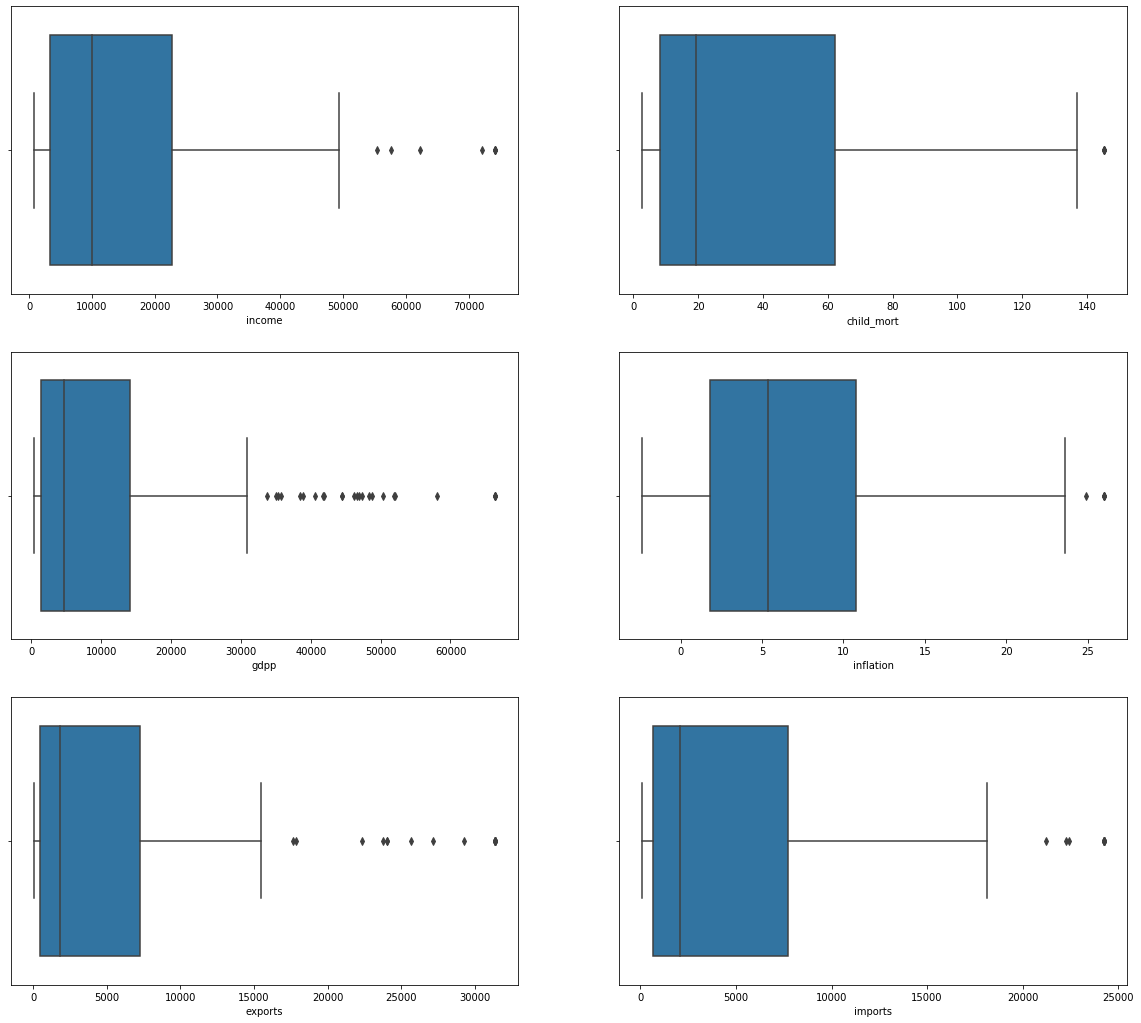

In [62]:
plt.figure(figsize=(20,18))

plt.subplot(3,2,1)
sns.boxplot('income',data=df)

plt.subplot(3,2,2)
sns.boxplot('child_mort',data=df)

plt.subplot(3,2,3)
sns.boxplot('gdpp',data=df)

plt.subplot(3,2,4)
sns.boxplot('inflation',data=df)

plt.subplot(3,2,5)
sns.boxplot('exports',data=df)

plt.subplot(3,2,6)
sns.boxplot('imports',data=df)
plt.show()

### Rescaling using Standard Scalar

In [63]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.754132,5783.251215,1056.733204,5140.799750,16692.637605,7.129643,70.555689,2.947964,12532.187066
std,38.594134,8579.961446,1801.408906,6695.667657,17370.798698,6.808765,8.893172,1.513848,16643.179779
min,2.800000,22.243716,12.821200,104.909640,742.240000,-2.348800,32.100000,1.150000,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,145.160000,31385.100000,8663.600000,24241.560000,74208.000000,25.988000,82.800000,7.490000,66364.000000


In [64]:
scale_cols=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [65]:
#  rescaling
rfm_df = df[scale_cols]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [66]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = [scale_cols]
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.362995,-0.669604,-0.565040,-0.732894,-0.870887,0.340341,-1.619092,1.902882,-0.721930
1,-0.549766,-0.542194,-0.439218,-0.472327,-0.390482,-0.388849,0.647866,-0.859973,-0.508772
2,-0.271688,-0.475859,-0.484826,-0.560304,-0.218991,1.321434,0.670423,-0.038404,-0.486473
3,2.111466,-0.418981,-0.532363,-0.543237,-0.623178,2.249495,-1.179234,2.128151,-0.542520
4,-0.713494,-0.027150,-0.178771,0.306340,0.139004,-0.838148,0.704258,-0.541946,-0.020019


### Hopkins Check

In [69]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [70]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.8740054403941176

-- Higher values indicates it has a  high tendency to cluster

## Clustering

### K Means Clustering

### Finding the Optimal Number of Clusters

#### A) SSD

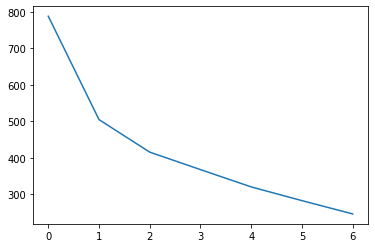

In [71]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### B) Silhouette Analysis

In [81]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4722260243921151
For n_clusters=3, the silhouette score is 0.40123143009349704
For n_clusters=4, the silhouette score is 0.3434886413731235
For n_clusters=5, the silhouette score is 0.3279894506610432
For n_clusters=6, the silhouette score is 0.29329131153768906
For n_clusters=7, the silhouette score is 0.33309347049050564
For n_clusters=8, the silhouette score is 0.3002326380612719


In [82]:
# Choosing the value of k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [83]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [84]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [85]:
# count the number of observations per cluster
df['cluster_id'].value_counts().sort_values()

2    37
0    48
1    82
Name: cluster_id, dtype: int64

#### Visualize the  Clusters

#### A) Using Box Plot

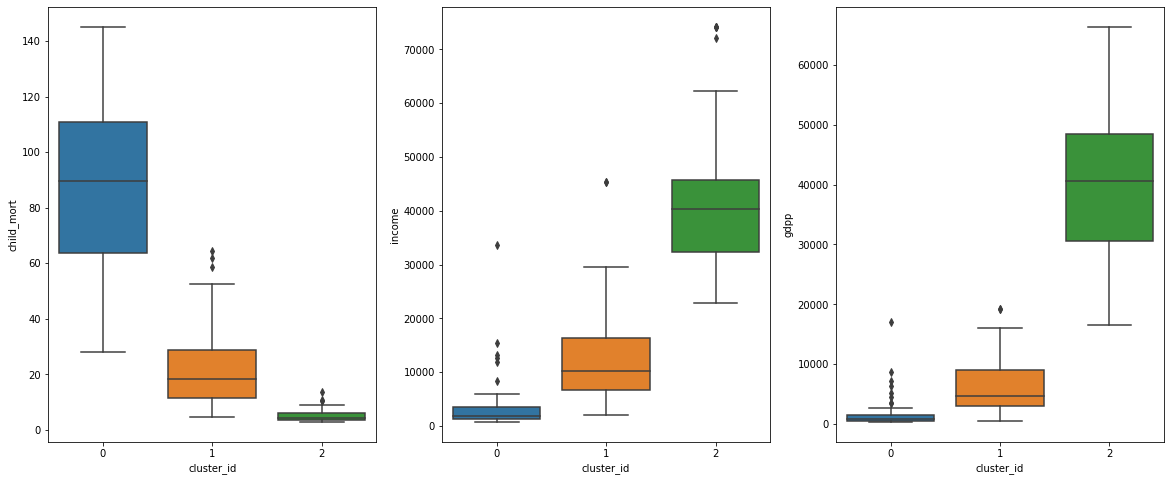

In [86]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='child_mort', data=df)

plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='income', data=df)

plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='gdpp', data=df)


plt.show()

#### B) Using Scatter Plot

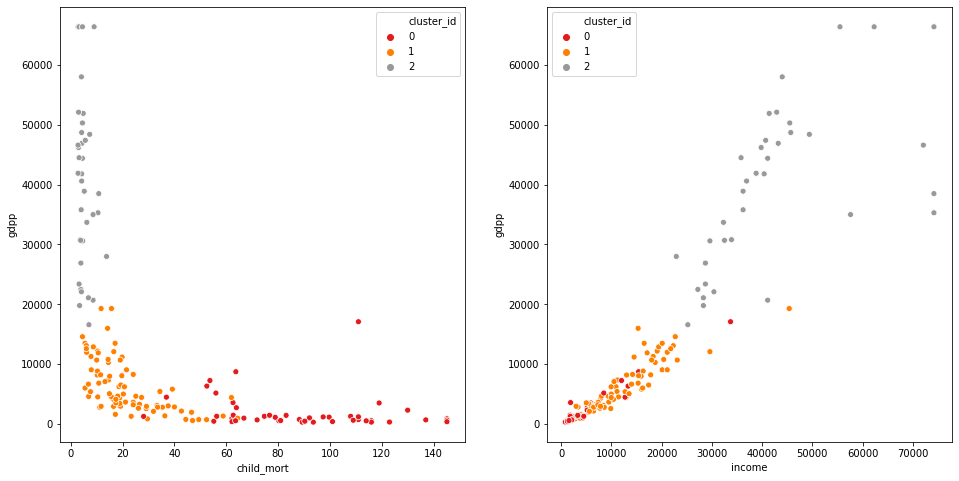

In [87]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='child_mort', y = 'gdpp', hue='cluster_id' ,legend='full', data=df, palette='Set1')

plt.subplot(1,2,2)
sns.scatterplot(x='income', y = 'gdpp', hue='cluster_id' ,legend='full', data=df, palette='Set1')

plt.show()

#### From the above graphs,we can conclude that Cluster 0 is the one which is  in dire need of aid, since they have lowest gdpp,lowest income and high child mortality rate

In [98]:
# Fetching the top 5 countries which are in dire aid of need
df[df['cluster_id']==0].sort_values(['gdpp','income','child_mort'], ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
88,Liberia,89.30,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.02,331.62,0,0
26,Burundi,93.60,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.26,331.62,0,0
37,"Congo, Dem. Rep.",116.00,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.54,334.00,0,0
112,Niger,123.00,77.256000,17.9568,170.86800,814.00,2.55,58.8,7.49,348.00,0,0
132,Sierra Leone,145.16,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.20,399.00,0,0


## Hierarchical Clustering

#### A) Using single linkage

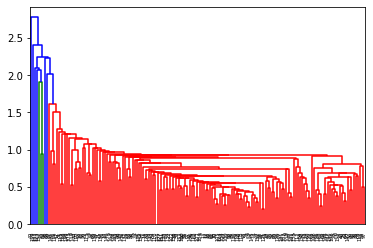

In [99]:
single_mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(single_mergings)
plt.show()

#### B) Using complete linkage

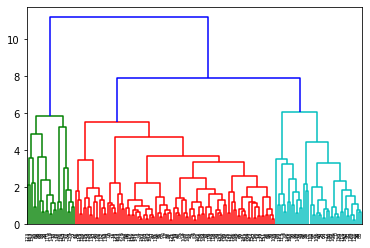

In [100]:
complete_mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(complete_mergings)
plt.show()

#### C) Using Average Linkage

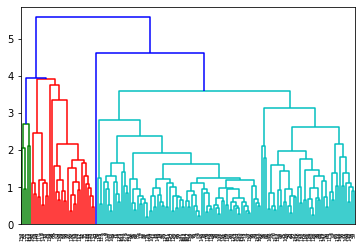

In [101]:
avearge_mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(avearge_mergings)
plt.show()

##### Selecting the value of k based on complete linkage

In [102]:
# Dividing the dendogram into 3 clusters
cluster_labels = cut_tree(complete_mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [103]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,1


In [104]:
# records for distinct cluster labels
df.cluster_labels.value_counts().sort_values()

2     24
0     43
1    100
Name: cluster_labels, dtype: int64

#### Visualize the cluster labels

#### A) Using box plot

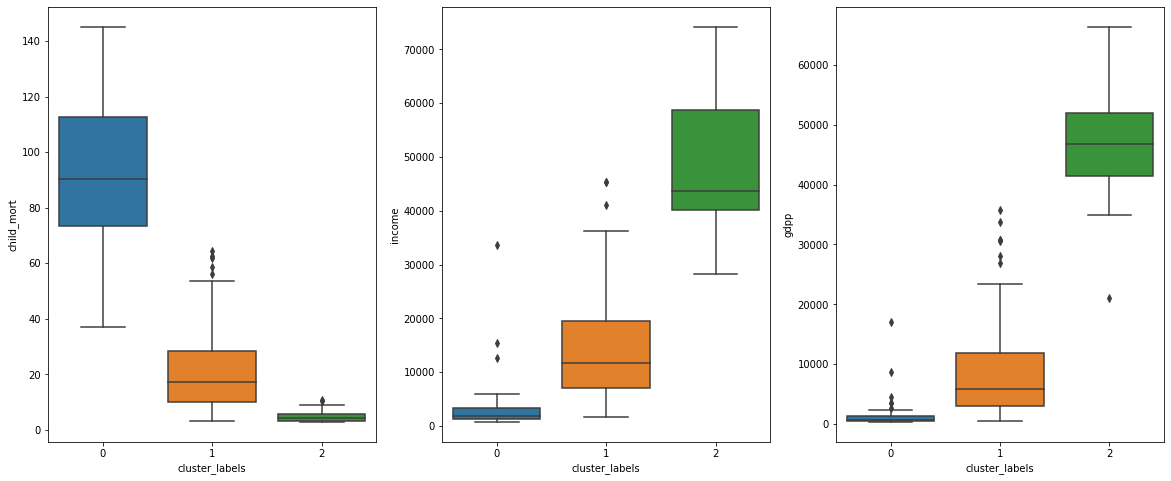

In [105]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

plt.subplot(1,3,2)
sns.boxplot(x='cluster_labels', y='income', data=df)

plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=df)


plt.show()

#### B) Using Scatter plots

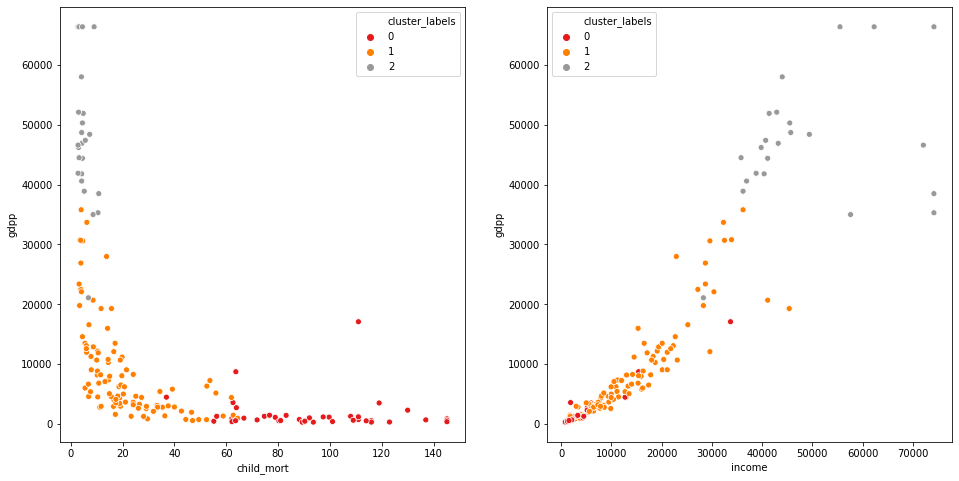

In [108]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='child_mort', y = 'gdpp', hue='cluster_labels' ,legend='full', data=df, palette='Set1')

plt.subplot(1,2,2)
sns.scatterplot(x='income', y = 'gdpp', hue='cluster_labels' ,legend='full', data=df, palette='Set1')

plt.show()

#### From the above graphs,we can conclude that Cluster 0 is the one which is  in dire need of aid, since they have lowest gdpp,lowest income and high child mortality rate

In [109]:
# Fetching the top 5 countries whicg are in dire aid of need
df[df['cluster_labels']==0].sort_values(['gdpp','income','child_mort'], ascending=[True,True,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
88,Liberia,89.30,62.457000,38.5860,302.80200,742.24,5.47,60.8,5.02,331.62,0,0
26,Burundi,93.60,22.243716,26.7960,104.90964,764.00,12.30,57.7,6.26,331.62,0,0
37,"Congo, Dem. Rep.",116.00,137.274000,26.4194,165.66400,742.24,20.80,57.5,6.54,334.00,0,0
112,Niger,123.00,77.256000,17.9568,170.86800,814.00,2.55,58.8,7.49,348.00,0,0
132,Sierra Leone,145.16,67.032000,52.2690,137.65500,1220.00,17.20,55.0,5.20,399.00,0,0
